In [1]:
# !pip install openpyxl --upgrade
# !pip install openpyxl_xlsx --upgrade
# !pip install pyexcel --upgrade

In [2]:
excel_file = "../SampleData/epl.xlsx"

In [3]:
import tempfile
from zipfile import ZipFile
import shutil
import os
from fnmatch import fnmatch


def change_in_zip(file_name, name_filter, change):
    tempdir = tempfile.mkdtemp()
    try:
        tempname = os.path.join(tempdir, "new.zip")
        with ZipFile(file_name, "r") as r, ZipFile(tempname, "w") as w:
            for item in r.infolist():
                data = r.read(item.filename)
                if fnmatch(item.filename, name_filter):
                    data = change(data)
                w.writestr(item, data)
        shutil.move(tempname, file_name)
    finally:
        shutil.rmtree(tempdir)


change_in_zip(
    excel_file,
    name_filter="xl/worksheets/*.xml",  # the problematic property is found in the worksheet xml files
    change=lambda d: d.replace(b' synchVertical="1"', b" "),
)

In [4]:
import pandas as pd
import numpy as np

In [5]:
epl = pd.read_excel(excel_file)
epl

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,sec,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome
0,2012,441999,3,Arsenal,56,Sunderland,688830980,1,18Aug2012,14:31:54,...,0,3,NaN,NaN,NaN,0.0,0.0,34,Team set up,1
1,2012,441999,3,Arsenal,56,Sunderland,1399442519,1,18Aug2012,14:33:35,...,0,56,NaN,NaN,NaN,0.0,0.0,34,Team set up,1
2,2012,441999,3,Arsenal,56,Sunderland,1641098842,2,18Aug2012,15:01:59,...,0,3,NaN,NaN,NaN,0.0,0.0,32,Start,1
3,2012,441999,3,Arsenal,56,Sunderland,1755825990,2,18Aug2012,15:01:59,...,0,56,NaN,NaN,NaN,0.0,0.0,32,Start,1
4,2012,441999,3,Arsenal,56,Sunderland,164697335,3,18Aug2012,15:02:00,...,1,3,17733.0,"Podolski, Lukas",Striker,50.0,50.0,1,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648878,2012,442378,111,Wigan Athletic,7,Aston Villa,428661649,905,19May2013,17:51:58,...,35,111,NaN,NaN,NaN,0.0,0.0,30,End,1
648879,2012,442378,111,Wigan Athletic,7,Aston Villa,1411196656,907,19May2013,18:00:29,...,0,111,NaN,NaN,NaN,0.0,0.0,30,End,1
648880,2012,442378,111,Wigan Athletic,7,Aston Villa,948803408,908,19May2013,18:00:29,...,0,111,NaN,NaN,NaN,0.0,0.0,37,Collection End,1
648881,2012,442378,111,Wigan Athletic,7,Aston Villa,803034702,810,19May2013,18:00:30,...,0,7,NaN,NaN,NaN,0.0,0.0,30,End,1


In [6]:
epl.columns

Index(['season_id', 'match_id', 'home_team_id', 'home_team_name',
       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
       'playerPosition', 'x', 'y', 'type', 'description', 'outcome'],
      dtype='object')

In [7]:
epl[~epl.player_id.isna()]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,sec,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome
4,2012,441999,3,Arsenal,56,Sunderland,164697335,3,18Aug2012,15:02:00,...,1,3,17733.0,"Podolski, Lukas",Striker,50.0,50.0,1,Pass,1
5,2012,441999,3,Arsenal,56,Sunderland,763384109,4,18Aug2012,15:02:01,...,2,3,19524.0,"Cazorla, Santiago",Midfielder,53.7,50.3,1,Pass,1
6,2012,441999,3,Arsenal,56,Sunderland,708867683,5,18Aug2012,15:02:04,...,4,3,15943.0,"Vermaelen, Thomas",Defender,30.6,52.5,1,Pass,1
7,2012,441999,3,Arsenal,56,Sunderland,383316420,6,18Aug2012,15:02:07,...,7,3,20467.0,"Walcott, Theo",Midfielder,77.8,4.2,61,Ball touch,0
8,2012,441999,3,Arsenal,56,Sunderland,1844010917,7,18Aug2012,15:02:08,...,8,3,20467.0,"Walcott, Theo",Midfielder,76.0,-1.4,5,Out,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648872,2012,442378,111,Wigan Athletic,7,Aston Villa,1158979068,903,19May2013,17:51:46,...,23,111,50105.0,"Espinoza, Roger",Defender,38.3,64.5,49,Ball recovery,1
648873,2012,442378,111,Wigan Athletic,7,Aston Villa,1491904314,904,19May2013,17:51:48,...,25,111,50105.0,"Espinoza, Roger",Defender,53.4,66.6,1,Pass,0
648874,2012,442378,111,Wigan Athletic,7,Aston Villa,37086327,806,19May2013,17:51:49,...,26,7,21095.0,"Vlaar, Ron",Defender,35.4,40.6,8,Interception,1
648875,2012,442378,111,Wigan Athletic,7,Aston Villa,359349525,807,19May2013,17:51:52,...,29,7,41823.0,"Delph, Fabian",Midfielder,34.7,62.9,49,Ball recovery,1


In [8]:
epl.columns

Index(['season_id', 'match_id', 'home_team_id', 'home_team_name',
       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
       'playerPosition', 'x', 'y', 'type', 'description', 'outcome'],
      dtype='object')

In [9]:
epl.description.unique()

array(['Team set up', 'Start', 'Pass', 'Ball touch', 'Out', 'Aerial',
       'Ball recovery', 'Dispossessed', 'Tackle', 'Clearance', 'Take On',
       'Deleted event', 'Challenge', 'Claim', 'Interception', 'Save',
       'Attempt Saved', 'Keeper pick-up', 'Foul', 'Miss',
       'Corner Awarded', 'Offside provoked', 'Offside Pass', 'End',
       'Player off', 'Player on', 'Start delay', 'End delay', 'Error',
       'Punch', 'Collection End', 'Card', 'Post', 'Shield ball opp',
       'Goal', 'Formation change', 'Keeper Sweeper', 'Penalty faced',
       'Contentious referee decision', 'Chance missed',
       'Cross not claimed', 'Good skill', 'Smother', 'Foul throw-in',
       'Player retired', 'Temp_Attempt'], dtype=object)

In [10]:
# Descriptions: 

# array(['Team set up', 'Start', 'Pass', 'Ball touch', 'Out', 'Aerial',
#        'Ball recovery', 'Dispossessed', 'Tackle', 'Clearance', 'Take On',
#        'Deleted event', 'Challenge', 'Claim', 'Interception', 'Save',
#        'Attempt Saved', 'Keeper pick-up', 'Foul', 'Miss',
#        'Corner Awarded', 'Offside provoked', 'Offside Pass', 'End',
#        'Player off', 'Player on', 'Start delay', 'End delay', 'Error',
#        'Punch', 'Collection End', 'Card', 'Post', 'Shield ball opp',
#        'Goal', 'Formation change', 'Keeper Sweeper', 'Penalty faced',
#        'Contentious referee decision', 'Chance missed',
#        'Cross not claimed', 'Good skill', 'Smother', 'Foul throw-in',
#        'Player retired', 'Temp_Attempt'], dtype=object)

# Get all passes, from - to

# Get all events .iloc[i] where .iloc[i+1].event_id == 1
# epl["event_id"].shift(-1) == 1 # True if the next event is a goal

# Get all events, start Ball Recovery, through Passes, to Goals/Loss of Possession

epl[((epl["description"] == "Pass") & (epl["outcome"] == 1) & (epl["outcome"].shift(-1) == 1))]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,sec,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome
4,2012,441999,3,Arsenal,56,Sunderland,164697335,3,18Aug2012,15:02:00,...,1,3,17733.0,"Podolski, Lukas",Striker,50.0,50.0,1,Pass,1
5,2012,441999,3,Arsenal,56,Sunderland,763384109,4,18Aug2012,15:02:01,...,2,3,19524.0,"Cazorla, Santiago",Midfielder,53.7,50.3,1,Pass,1
14,2012,441999,3,Arsenal,56,Sunderland,696371869,9,18Aug2012,15:02:21,...,21,3,8758.0,"Arteta, Mikel",Midfielder,56.2,15.9,1,Pass,1
18,2012,441999,3,Arsenal,56,Sunderland,604656586,12,18Aug2012,15:02:24,...,24,3,8758.0,"Arteta, Mikel",Midfielder,56.2,21.4,1,Pass,1
19,2012,441999,3,Arsenal,56,Sunderland,1367598371,13,18Aug2012,15:02:25,...,25,3,80254.0,"Jenkinson, Carl",Defender,44.6,11.2,1,Pass,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648863,2012,442378,111,Wigan Athletic,7,Aston Villa,845864327,898,19May2013,17:51:19,...,56,111,106458.0,"Campadabal, Eduard",Substitute,58.7,13.7,1,Pass,1
648864,2012,442378,111,Wigan Athletic,7,Aston Villa,1123971723,899,19May2013,17:51:20,...,57,111,16210.0,"Scharner, Paul",Defender,59.0,24.0,1,Pass,1
648868,2012,442378,111,Wigan Athletic,7,Aston Villa,388749588,803,19May2013,17:51:33,...,10,7,41823.0,"Delph, Fabian",Midfielder,12.3,71.2,1,Pass,1
648869,2012,442378,111,Wigan Athletic,7,Aston Villa,1235056096,804,19May2013,17:51:39,...,17,7,80979.0,"Weimann, Andreas",Striker,47.6,86.6,1,Pass,1


In [11]:
# Get  all events that come before and after a pass but are not a pass

before_evs = epl.iloc[
    epl[epl["description"] == "Pass"].index - 1
].description.unique()  # events before a pass
after_evs = epl.iloc[
    epl[epl["description"] == "Pass"].index + 1
].description.unique()  # events after a pass

before_evs, after_evs

(array(['Start', 'Pass', 'Out', 'Aerial', 'Tackle', 'Clearance',
        'Ball recovery', 'Challenge', 'Claim', 'Interception', 'Take On',
        'Ball touch', 'Dispossessed', 'Keeper pick-up', 'Foul',
        'Deleted event', 'Corner Awarded', 'Offside Pass', 'Player on',
        'Offside provoked', 'Player off', 'End delay', 'Error',
        'Attempt Saved', 'Card', 'Miss', 'Save', 'Goal',
        'Formation change', 'Keeper Sweeper',
        'Contentious referee decision', 'Punch', 'Cross not claimed',
        'Penalty faced', 'Good skill', 'Shield ball opp', 'Chance missed',
        'Foul throw-in', 'Post', 'Smother', 'End', 'Start delay',
        'Team set up', 'Player retired'], dtype=object),
 array(['Pass', 'Ball touch', 'Aerial', 'Ball recovery', 'Clearance',
        'Take On', 'Out', 'Tackle', 'Dispossessed', 'Claim',
        'Interception', 'Save', 'Challenge', 'Attempt Saved',
        'Deleted event', 'Miss', 'Foul', 'End', 'Offside Pass',
        'Corner Awarded', 'Punch'

In [12]:
list(epl["description"].unique())

['Team set up',
 'Start',
 'Pass',
 'Ball touch',
 'Out',
 'Aerial',
 'Ball recovery',
 'Dispossessed',
 'Tackle',
 'Clearance',
 'Take On',
 'Deleted event',
 'Challenge',
 'Claim',
 'Interception',
 'Save',
 'Attempt Saved',
 'Keeper pick-up',
 'Foul',
 'Miss',
 'Corner Awarded',
 'Offside provoked',
 'Offside Pass',
 'End',
 'Player off',
 'Player on',
 'Start delay',
 'End delay',
 'Error',
 'Punch',
 'Collection End',
 'Card',
 'Post',
 'Shield ball opp',
 'Goal',
 'Formation change',
 'Keeper Sweeper',
 'Penalty faced',
 'Contentious referee decision',
 'Chance missed',
 'Cross not claimed',
 'Good skill',
 'Smother',
 'Foul throw-in',
 'Player retired',
 'Temp_Attempt']

In [13]:
# !pip install tqdm
from tqdm import tqdm

In [14]:
epl["next_entity"] = epl["playerName"].shift(-1)

In [15]:
match_groups = []

group_end = 0

iterable = tqdm(range(len(epl) - 1))
for i in iterable:

    if i <= group_end:
        continue

    if (
        epl.iloc[i].description in before_evs
        # epl.iloc[i].description != "Pass"
        and epl.iloc[i + 1].description == "Pass"
        and epl.iloc[i].team_id == epl.iloc[i + 1].team_id
    ):
        group_start = i
        for j in range(i+1, len(epl) - 1):
            if epl.iloc[j].description != "Pass" or epl.iloc[j].team_id != epl.iloc[j + 1].team_id:
                # If next is [Goal, Miss, Attempt Saved, Post, Temp_Attempt], next_entity is Shot
                if epl.loc[j, "description"] in [
                    "Goal",
                    "Miss",
                    "Attempt Saved",
                    "Post",
                    "Temp_Attempt",
                ]:
                    epl.loc[j, "next_entity"] = "Shot"
                else:
                    # Else, next_entity is Loss of Possession
                    epl.loc[j, "next_entity"] = "Loss"

                group_end = j
                break

        if group_start == group_end:
            continue

        # print(group_start, group_end)
        iterable.set_postfix_str(f"Grouping from {group_start} to {group_end}")

        if group_start == 0:
            match_groups.append(epl.iloc[:group_end+1])
        if group_end == len(epl) - 1:
            match_groups.append(epl.iloc[group_start:group_end])
        else:
            match_groups.append(epl.iloc[group_start-1:group_end+1])

100%|██████████| 648882/648882 [02:46<00:00, 3900.40it/s, Grouping from 648875 to 648877]


In [16]:
match_groups[0]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome,next_entity
3,2012,441999,3,Arsenal,56,Sunderland,1755825990,2,18Aug2012,15:01:59,...,56,NaN,NaN,NaN,0.0,0.0,32,Start,1,"Podolski, Lukas"
4,2012,441999,3,Arsenal,56,Sunderland,164697335,3,18Aug2012,15:02:00,...,3,17733.0,"Podolski, Lukas",Striker,50.0,50.0,1,Pass,1,"Cazorla, Santiago"
5,2012,441999,3,Arsenal,56,Sunderland,763384109,4,18Aug2012,15:02:01,...,3,19524.0,"Cazorla, Santiago",Midfielder,53.7,50.3,1,Pass,1,"Vermaelen, Thomas"
6,2012,441999,3,Arsenal,56,Sunderland,708867683,5,18Aug2012,15:02:04,...,3,15943.0,"Vermaelen, Thomas",Defender,30.6,52.5,1,Pass,1,"Walcott, Theo"
7,2012,441999,3,Arsenal,56,Sunderland,383316420,6,18Aug2012,15:02:07,...,3,20467.0,"Walcott, Theo",Midfielder,77.8,4.2,61,Ball touch,0,Loss


In [17]:
match_groups[1]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome,next_entity
8,2012,441999,3,Arsenal,56,Sunderland,1844010917,7,18Aug2012,15:02:08,...,3,20467.0,"Walcott, Theo",Midfielder,76.0,-1.4,5,Out,0,"Sessegnon, Stephane"
9,2012,441999,3,Arsenal,56,Sunderland,975952081,3,18Aug2012,15:02:09,...,56,34392.0,"Sessegnon, Stephane",Midfielder,22.0,101.8,5,Out,1,"Richardson, Kieran"
10,2012,441999,3,Arsenal,56,Sunderland,861562098,4,18Aug2012,15:02:18,...,56,15073.0,"Richardson, Kieran",Midfielder,22.5,100.0,1,Pass,0,Loss


In [18]:
match_groups[139]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome,next_entity
1102,2012,441999,3,Arsenal,56,Sunderland,1886139156,431,18Aug2012,16:13:51,...,56,28448.0,"Cattermole, Lee",Midfielder,21.3,56.4,45,Challenge,0,"Walcott, Theo"
1103,2012,441999,3,Arsenal,56,Sunderland,1409788908,687,18Aug2012,16:13:51,...,3,20467.0,"Walcott, Theo",Midfielder,76.0,49.5,3,Take On,1,"Walcott, Theo"
1104,2012,441999,3,Arsenal,56,Sunderland,2015080637,688,18Aug2012,16:13:52,...,3,20467.0,"Walcott, Theo",Midfielder,80.5,47.8,1,Pass,0,Loss


In [19]:
match_groups[140]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome,next_entity
1105,2012,441999,3,Arsenal,56,Sunderland,709488404,421,18Aug2012,16:13:53,...,56,3736.0,"O'Shea, John",Defender,15.2,52.8,8,Interception,1,"Cattermole, Lee"
1106,2012,441999,3,Arsenal,56,Sunderland,323774564,422,18Aug2012,16:13:54,...,56,28448.0,"Cattermole, Lee",Midfielder,22.6,53.9,49,Ball recovery,1,"Cattermole, Lee"
1107,2012,441999,3,Arsenal,56,Sunderland,532126784,423,18Aug2012,16:13:55,...,56,28448.0,"Cattermole, Lee",Midfielder,22.6,53.9,1,Pass,1,"Richardson, Kieran"
1108,2012,441999,3,Arsenal,56,Sunderland,1090812900,424,18Aug2012,16:13:57,...,56,15073.0,"Richardson, Kieran",Midfielder,17.3,67.7,1,Pass,1,"McClean, James"
1109,2012,441999,3,Arsenal,56,Sunderland,952738638,425,18Aug2012,16:13:58,...,56,63370.0,"McClean, James",Midfielder,29.7,93.5,1,Pass,1,"Sessegnon, Stephane"
1110,2012,441999,3,Arsenal,56,Sunderland,1365387546,426,18Aug2012,16:14:03,...,56,34392.0,"Sessegnon, Stephane",Midfielder,38.3,96.1,1,Pass,1,"Colback, Jack"
1111,2012,441999,3,Arsenal,56,Sunderland,1095120644,427,18Aug2012,16:14:09,...,56,58771.0,"Colback, Jack",Midfielder,30.5,65.8,1,Pass,1,"Campbell, Fraizer"
1112,2012,441999,3,Arsenal,56,Sunderland,1036326880,428,18Aug2012,16:14:10,...,56,28541.0,"Campbell, Fraizer",Striker,38.4,36.7,1,Pass,0,Loss


In [20]:
epl.description.unique()

array(['Team set up', 'Start', 'Pass', 'Ball touch', 'Out', 'Aerial',
       'Ball recovery', 'Dispossessed', 'Tackle', 'Clearance', 'Take On',
       'Deleted event', 'Challenge', 'Claim', 'Interception', 'Save',
       'Attempt Saved', 'Keeper pick-up', 'Foul', 'Miss',
       'Corner Awarded', 'Offside provoked', 'Offside Pass', 'End',
       'Player off', 'Player on', 'Start delay', 'End delay', 'Error',
       'Punch', 'Collection End', 'Card', 'Post', 'Shield ball opp',
       'Goal', 'Formation change', 'Keeper Sweeper', 'Penalty faced',
       'Contentious referee decision', 'Chance missed',
       'Cross not claimed', 'Good skill', 'Smother', 'Foul throw-in',
       'Player retired', 'Temp_Attempt'], dtype=object)

In [21]:
goal_is = epl[epl["description"] == "Goal"].index

epl.iloc[list(set(goal_is - 1).union(set(goal_is)).union(set(goal_is + 1)))]

,season_id,match_id,home_team_id,home_team_name,away_team_id,away_team_name,id,event_id,date,time,...,team_id,player_id,playerName,playerPosition,x,y,type,description,outcome,next_entity
73729,2012,442042,4,Newcastle United,45,Norwich City,46291342,207,23Sep2012,15:20:01,...,4,18753.0,"Ben Arfa, Hatem",Midfielder,54.9,33.1,1,Pass,1,"Ba, Demba"
73730,2012,442042,4,Newcastle United,45,Norwich City,15765060,208,23Sep2012,15:20:03,...,4,47412.0,"Ba, Demba",Striker,86.9,52.6,16,Goal,1,Shot
73731,2012,442042,4,Newcastle United,45,Norwich City,1395872815,187,23Sep2012,15:21:03,...,45,28499.0,"Hoolahan, Wes",Midfielder,49.8,50.9,1,Pass,1,"Morison, Steve"
188420,2012,442109,3,Arsenal,6,Tottenham Hotspur,345693299,460,17Nov2012,13:31:19,...,3,19524.0,"Cazorla, Santiago",Midfielder,91.7,72.6,1,Pass,1,"Giroud, Olivier"
188421,2012,442109,3,Arsenal,6,Tottenham Hotspur,1954157632,461,17Nov2012,13:31:21,...,3,44346.0,"Giroud, Olivier",Striker,91.6,53.6,16,Goal,1,Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598001,2012,442348,111,Wigan Athletic,6,Tottenham Hotspur,823861342,362,27Apr2013,16:07:27,...,111,61538.0,"McManaman, Callum",Striker,82.4,37.9,16,Goal,1,Shot
598002,2012,442348,111,Wigan Athletic,6,Tottenham Hotspur,351736095,461,27Apr2013,16:08:20,...,6,36903.0,"Bale, Gareth",Striker,50.1,49.9,1,Pass,1,"Defoe, Jermain"
458746,2012,442266,108,Reading,111,Wigan Athletic,731350704,648,23Feb2013,15:46:07,...,108,49982.0,"Morrison, Sean",Defender,57.9,31.7,51,Error,1,"Kone, Arouna"
458747,2012,442266,108,Reading,111,Wigan Athletic,926528393,503,23Feb2013,15:46:09,...,111,26921.0,"Kone, Arouna",Striker,87.9,32.2,16,Goal,1,"Pogrebnyak, Pavel"


In [22]:
goal_is - 1

Index([  2947,   4022,   4257,   4486,   4688,   5072,   5912,   6383,   6515,
         6584,
       ...
       646070, 646238, 646564, 646591, 646958, 647068, 647284, 647502, 647997,
       648307],
      dtype='int64', length=1063)

In [23]:
shot_count = 0
for group in match_groups:
    if "Shot" in group["next_entity"].values:
        # display(group)
        shot_count += 1

shot_count

3763

In [24]:
# sum counts [
#     "Goal",
#     "Miss",
#     "Attempt Saved",
#     "Post",
#     "Temp_Attempt",
# ]

vc = epl.description.value_counts()

vc[["Goal", "Miss", "Attempt Saved", "Post", "Temp_Attempt"]].sum()

np.int64(10608)

In [119]:
def split_match_by_plays(match_evs):
    match_groups = []
    group_end = 0
    indexes = match_evs.index[:-1]
    # iterable = tqdm(range(len(indexes) - 1))
    iterable = range(len(indexes) - 1)
    for k in iterable:
        i = indexes[k]
        i_1 = indexes[k + 1]

        if i <= group_end:
            continue

        if (
            match_evs.loc[i, "description"] in before_evs
            # match_evs.iloc[i].description != "Pass"
            and match_evs.loc[i_1, "description"] == "Pass"
            and match_evs.loc[i, "team_id"] == match_evs.loc[i_1, "team_id"]
        ):
            group_start = i
            for q in range(i_1, len(match_evs) - 1):
                j = indexes[q]
                j_1 = indexes[q + 1]
                if (
                    match_evs.loc[j, "description"] != "Pass"
                    or match_evs.loc[j, "team_id"] != match_evs.loc[j_1, "team_id"]
                ):
                    # If next is [Goal, Miss, Attempt Saved, Post, Temp_Attempt], next_entity is Shot
                    if match_evs.loc[j, "description"] in [
                        "Goal",
                        "Miss",
                        "Attempt Saved",
                        "Post",
                        "Temp_Attempt",
                    ]:
                        match_evs.loc[j, "next_entity"] = "Shot"
                    else:
                        # Else, next_entity is Loss of Possession
                        match_evs.loc[j, "next_entity"] = "Loss"

                    group_end = j
                    break

            if group_start == group_end:
                continue

            if group_start == 0:
                ev = match_evs.iloc[: group_end + 1]
                # match_groups.append(match_evs.iloc[: group_end + 1])
            if group_end == len(match_evs) - 1:
                ev = match_evs.iloc[group_start:group_end]
                # match_groups.append(match_evs.iloc[group_start:group_end])
            else:
                ev = match_evs.iloc[group_start - 1 : group_end + 1]
                # match_groups.append(match_evs.iloc[group_start - 1 : group_end + 1])

            if ev.shape[0] > 0:
                match_groups.append(ev)

    return match_groups

In [190]:
from IPython.display import display, Markdown

In [233]:
# The amount of time in minutes that two players p_i and p_j share the field:
# t_g(p_i, p_j)

# When i=j, t_g(p_i, p_i) represents the total time player p_i is on the field during game g

# transition r_g(G,p_i): from the gain state to a player p_i as
# r_g(G,p_i)= g_g(p_i)/t_g(p_i, p_i)                                                        (4)

# the rate of passes between two players
# r_g(p_i,p_j) = m_g(p_i,p_j)/t_g(p_i,p_j)                                                  (5)

# the rates from a player to losses
# r_g(p_i, L) = l_g(p_i)/t_g(p_i,p_i)                                                       (6)

# the rates from a player to shots
# r_g(p_i, S) = s_g(p_i)/t_g(p_i,p_i)                                                       (7)

# the transition probability q_g(U, V) between any two states U and V is given by

#                                    r_g(U,V)
# q_g(U, V) =  -----------------------------------------------------------                  (8)
#              r_g(U,G) + r_g(U,S) + r_g(U,L) + sum_{i=1}^{11}{r_g(U,p_i)}

# By arranging the transition proba- bilities qg into matrix form
# we obtain the matrix of transition probabilities:
# Q_g(A) of game g for the corresponding team A as

# q_g(G, S) = q_g(G,L) = 0
# q_g(p_i, p_i) = 0

#           | 0 q_g(G,   p_1) q_g(G,   p_2) ... q_g(G,   p_11)      0           0      |
#           | 0 q_g(p_1, p_1) q_g(p_1, p_2) ... q_g(p_1, p_11) q_g(p_1, S) q_g(p_1, L) |
# Q_g(A)  = |               ⋮                                                          |    (9)
#           | 0 q_g(p_11,p_1) q_g(p_11,p_2) ... q_g(p_11,p_11) q_g(p_11,S) q_g(p_11,L) |
#           | 0        0            0       ...       0             1           0      |
#           | 0        0            0       ...       0             0           1      |

# The matrix Q_g(A) is a 14 × 14 matrix,
# where the first row corresponds to probabilities out of state G,
# from the second row up to row twelve we have the probabilities out of each player (note that q_g(p_i,p_i)=0),
# and the last two rows contain the probabilities out of S and L, which are absorbing states.

# Define the following block decomposition of Q_g(A)

#           |  T_{12x12}   R_{12x2}  |
# Q_g(A) =  |
#           |  0_{2x12}    I_{2x2}   |

# where T contains the transition probabilities between transient states,
# R contains the transition probabilities from transient to absorbing states,
# 0 is a block of all zeros and I is an identity block.
#
# Leveraging this decomposition, the probability of shot before loss p_g(A) can be estimated from Qq(A) as we state in the following definition.

# p^_g(A) = [1, 0_{1×11}](I_{12x12} - T)^{-1} R[0, 1]^T

# [1, 0_{1×11}] is a row vector of length 12 with a 1 in the first position and zeros elsewhere.
# [0, 1]^T is a column vector of length 2 with a 1 in the second position and zeros elsewhere.

# The matrix (I_{12x12} - T)^{-1} is the inverse of the matrix I_{12x12} - T.
# The inverse of a matrix is a matrix that when multiplied by the original matrix gives an identity matrix.

# For a Given Game g, the probability of shot before loss p_g(A) is the probability that the team A will shoot before losing the ball in that game.


# For each match, each team
# For each player:
#      Count gains (group[0].next_entity is player)
#      Count losses (group[-1].next_entity is loss then group[-1].player is player)
#      Passes between players group[1:-2].player and group[1:-2].next_entity
#      Shots (epl["description"] in ["Goal", "Miss", "Attempt Saved", "Post", "Temp_Attempt"]) then player

def display_transition_probabilities(Q, lu):
    display(Markdown("Transition Probabilities"))
    cols = pd.Series(np.empty(14))
    cols.iloc[0] = "Gain"
    cols.iloc[-2] = "Shot"
    cols.iloc[-1] = "Loss"
    cols.iloc[1:-2] = lu
    display(pd.DataFrame(Q, columns=cols, index=cols))


def get_player_gains(match_groups, player_name):
    return sum(
        1 for group in match_groups if group["playerName"].values[0] == player_name
    )


def get_player_losses(match_groups, player_name):
    if len(match_groups) == 0:
        return 0

    d = pd.concat(match_groups)
    return d[(d["next_entity"] == "Loss") & (d["playerName"] == player_name)].shape[0]


def passes_between_players(match_groups, player_name_a, player_name_b):
    return sum(
        1
        for group in match_groups[1:-2]
        if (
            group["playerName"].values[0] == player_name_a
            and group["next_entity"].values[-1] == player_name_b
        )
        or (
            group["playerName"].values[0] == player_name_b
            and group["next_entity"].values[-1] == player_name_a
        )
    )


def get_player_shots(match, player_name):
    return sum(
        1
        for i in match.index
        if match.loc[i, "description"]
        in ["Goal", "Miss", "Attempt Saved", "Post", "Temp_Attempt"]
        and match.loc[i, "playerName"] == player_name
    )


def split_match_events_by_substitution(match):
    subs_index = match[match["description"].isin(["Player off", "Player on"])].index
    if len(subs_index) == 0:
        return [match], [match["playerName"].dropna().unique()], [], [], []

    lineups = [match.loc[0 : subs_index[0] - 1]["playerName"].dropna().unique()]
    match_groups = [match.loc[0 : subs_index[0] - 1]]
    ev_indexes = [(0, subs_index[0] - 1)]
    on_offs = []

    for i in range(0, len(subs_index) - 2, 2):
        evs = match.loc[
            subs_index[i + 1] + 1 : subs_index[i + 2] - 1
        ]

        ev_indexes.append((subs_index[i + 1] + 1, subs_index[i + 2] - 1))
        # print(subs_index[i + 1] + 1, subs_index[i + 2] - 1)

        match_groups.append(evs)

        updated_formation = lineups[-1].copy()

        # Get player off and player on
        player_off = match.loc[subs_index[i], "playerName"]
        player_on = match.loc[subs_index[i + 1], "playerName"]

        on_offs.append((player_off, player_on))

        # Update formation
        updated_formation[updated_formation == player_off] = player_on
        lineups.append(updated_formation)

    lineups.append(match.iloc[subs_index[-1] + 1 :]["playerName"].dropna().unique())
    match_groups.append(match.loc[subs_index[-1] + 1 :])
    ev_indexes.append((subs_index[-1] + 1, len(match) - 1))

    on_offs.append(
        (
            match.loc[subs_index[-2], "playerName"],
            match.loc[subs_index[-1], "playerName"],
        )
    )

    return match_groups, lineups, subs_index, ev_indexes, on_offs


def psl_estimator(Q):
    # Define the following block decomposition of Q_g(A)

    #           |  T_{12x12}   R_{12x2}  |
    # Q_g(A) =  |
    #           |  0_{2x12}    I_{2x2}   |

    # where T contains the transition probabilities between transient states,
    # R contains the transition probabilities from transient to absorbing states,
    # 0 is a block of all zeros and I is an identity block.

    # Leveraging this decomposition, the probability of shot before loss p_g(A) can be estimated from Qq(A) as we state in the following definition.

    # p^_g(A) = [1, 0_{1×11}](I_{12x12} - T)^{-1} R[0, 1]^T

    # [1, 0_{1×11}] is a row vector of length 12 with a 1 in the first position and zeros elsewhere.
    # [0, 1]^T is a column vector of length 2 with a 1 in the second position and zeros elsewhere.

    # The matrix (I_{12x12} - T)^{-1} is the inverse of the matrix I_{12x12} - T.
    # The inverse of a matrix is a matrix that when multiplied by the original matrix gives an identity matrix.

    # For a Given Game g, the probability of shot before loss p_g(A) is the probability that the team A will shoot before losing the ball in that game.

    # Definir T y R
    T = Q[:-2, :-2]
    R = Q[:-2, -2:]

    # Crear la matriz identidad I
    I = np.eye(T.shape[0])

    # Calcular la inversa de (I - T)
    inv = np.linalg.inv(I - T)

    # Crear el vector fila y el vector columna con las dimensiones correctas
    row_vec = np.zeros((1, 12))
    row_vec[0] = 1

    col_vec = np.zeros((2, 1))
    col_vec[0][0] = 1

    # Calcular psl
    psl = row_vec @ inv @ R @ col_vec

    return psl[0][0] / 100


matches = epl.match_id.unique()
teams_in_match = dict(epl.groupby("match_id").team_id.unique())
# players_in_match = epl.groupby(["match_id", "team_id"]).player_id.unique().reset_index()
# players = epl.player_id.unique()

# Sample Match
match_id = matches[0]
match = epl[epl["match_id"] == match_id]
team_ids = teams_in_match[match_id]
team_id_a = team_ids[0]
team_id_b = team_ids[1]

team_a_match = match[match["team_id"] == team_id_a]
team_b_match = match[match["team_id"] == team_id_b]

def psl_from_team_match(team_match):

    evs, lus, sui, evi, on_offs = split_match_events_by_substitution(team_match)

    psl_a = 0

    for i, (ev, lu, su, ei, on_off) in enumerate(zip(evs, lus, sui, evi, on_offs)):
        
        if len(ev) == 0 or len(lu) == 0:
            continue

        if len(lu) != 11:
            continue

        Q = np.zeros((14, 14))

        # print(ev.index)
        ev_g = split_match_by_plays(ev)

        # Format time from minutes ("min") and seconds ("sec") to minutes float
        time_from_s = (float(ev["min"].values[0]) * 60) + float(ev["sec"].values[0])
        time_to_s = (float(ev["min"].values[-1]) * 60) + float(ev["sec"].values[-1])

        delta_time = time_to_s - time_from_s

        # display(f"Lineup {i}, From {time_from} to {time_to} ({delta_time})")
        for i, player_a in enumerate(lu):
            p = player_a

            p_gains = get_player_gains(ev_g, player_a)
            p_losses = get_player_losses(ev_g, player_a)
            p_shots = get_player_shots(ev, player_a)

            p_g = 0
            p_l = 0
            p_s = 0
            if delta_time > 0:
                p_g = p_gains / delta_time
                p_l = p_losses / delta_time
                p_s = p_shots / delta_time

            p_ps = np.zeros(11)
            for j, player_b in enumerate(lu):
                if i != j:
                    p_passes = passes_between_players(ev_g, player_a, player_b)
                    # if p_passes > 0:
                    #     print(f"{player_a} passes to {player_b}: {p_passes}")

                    if delta_time > 0:
                        p_p = p_passes / delta_time
                        p_ps[j] = p_p

            p_r = p_g + p_s + p_l + sum(p_ps)

            if p_r > 0:
                q_g  = p_g / p_r
                q_s  = p_s / p_r
                q_l  = p_l / p_r
                q_ps = p_ps / p_r

                Q[i + 1, 0] = q_g
                Q[i + 1, -2] = q_s
                Q[i + 1, -1] = q_l
                Q[i + 1, 1:-2] = q_ps

            # display(f"Player {p} transition probabilities")
            # display(f"Gain: {q_g}")
            # display(f"Shot: {q_s}")
            # display(f"Loss: {q_l}")
            # display(f"Passes: {q_ps}")

        # display_transition_probabilities(Q, lu)

        psl = psl_estimator(Q)
        # display(f"PSL: {psl}")

        if psl > 0 and delta_time > 0:
            psl_a += psl / delta_time

        # display(f"Substitution {i}: {on_off}")

    return psl_a

def match_result(match):
    goals = match[match["description"] == "Goal"]
    goals_a = goals[goals["team_id"] == team_id_a].shape[0]
    goals_b = goals[goals["team_id"] == team_id_b].shape[0]

    if goals_a > goals_b:
        # Team A wins
        return 2
    elif goals_a < goals_b:
        # Team B wins
        return 0
    else:
        # Draw
        return 1

delta_psl = psl_from_team_match(team_a_match) - psl_from_team_match(team_b_match)
result = match_result(match)

delta_psl, result

(np.float64(6.833184373244488e-05), 1)

In [208]:
# Format date
epl["date"] = pd.to_datetime(epl["date"], format="%d%b%Y")

epl["date"].min(), epl["date"].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2013-05-19 00:00:00'))

### Season 12/13 (18 August 2012 – 19 May 2013) English Premier League PSL vs Win Rate

In [209]:
from datetime import datetime
import matplotlib.pyplot as plt

In [217]:
epl.columns

Index(['season_id', 'match_id', 'home_team_id', 'home_team_name',
       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
       'playerPosition', 'x', 'y', 'type', 'description', 'outcome',
       'next_entity'],
      dtype='object')

In [234]:
# Season 12/13 (18 August 2012 – 19 May 2013) English Premier League PSL vs Win Rate

epl_12_13 = epl[
    (epl["date"] >= "2012-08-18") & (epl["date"] <= "2013-05-19")
]

matches = epl_12_13.match_id.unique()
delta_psls = []
results = []

iterable = tqdm(matches)
for match_id in iterable:
    match = epl_12_13[epl_12_13["match_id"] == match_id]
    team_ids = teams_in_match[match_id]
    team_id_a = team_ids[0]
    team_id_b = team_ids[1]

    team_a_match = match[match["team_id"] == team_id_a]
    team_b_match = match[match["team_id"] == team_id_b]

    # 'home_team_id', 'home_team_name', 'away_team_id', 'away_team_name'

    # print(f"{team_a_match['home_team_name'].values[0]} vs {team_a_match['away_team_name'].values[0]}")
    # print(len(team_a_match), len(team_b_match))

    delta_psl = psl_from_team_match(team_a_match) - psl_from_team_match(team_b_match)
    result = match_result(match)

    delta_psls.append(delta_psl)
    results.append(result)

100%|██████████| 380/380 [00:58<00:00,  6.54it/s]


/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_93353/2603129054.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = data.groupby(bins)["Result"].sum().reset_index()
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_93353/2603129054.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total["Total"] = data.groupby(bins)["Result"].count().values
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_93353/2603129054.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

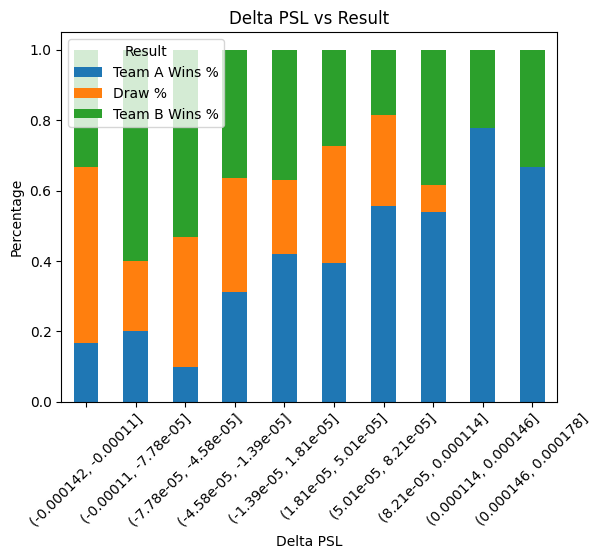

In [241]:
data = pd.DataFrame({"Delta PSL": delta_psls, "Result": results})

# Crear los bins
bin_count = 10
bins = pd.cut(data["Delta PSL"], bins=bin_count)

# Calcular los porcentajes
total = data.groupby(bins)["Result"].sum().reset_index()
total["Total"] = data.groupby(bins)["Result"].count().values

counts = data.groupby(bins)["Result"].value_counts()
counts = counts.unstack().reset_index()
counts["Total"] = total["Total"]

counts["Team A Wins %"] = counts[2] / counts["Total"]
counts["Draw %"] = counts[1] / counts["Total"]
counts["Team B Wins %"] = counts[0] / counts["Total"]

# stacked bar plot

fig, ax = plt.subplots()
counts[["Team A Wins %", "Draw %", "Team B Wins %"]].plot(
    kind="bar", stacked=True, ax=ax
)

plt.xticks(range(bin_count), counts["Delta PSL"].values, rotation=45)
plt.xlabel("Delta PSL")

plt.ylabel("Percentage")
plt.title("Delta PSL vs Result")

plt.show()